# Sentiment Analysis on Twitter Data 

## Data Pre-Processing

**Importing necessary libraries and reading the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataSet = "/content/drive/My Drive/Sentiment/Copy of trainingDataIRMFinal.csv"
df = pd.read_csv(dataSet,engine='python', error_bad_lines=False)

**Taking out sample data of 16000 entries to train our model**

In [5]:
df = df.iloc[:,[0,5]]
df.columns = ["Target","Tweet"] 
df = df.sample(frac=0.01) #16000

In [6]:
df.head()

,Target,Tweet
1098030,4,Hi it's sunny!
608602,0,I feel bad for the mail woman walking around i...
1576064,4,@BuzzBuzzLaura hmmm i dunno really haha i gues...
1512370,4,@chrishantha agreed with @chamila don't forge...
754979,0,I feel like garbage. I hate being sick. I also...


**Data contains almost equal amounts of negative as well as positive classes**

In [7]:
df.Target.value_counts()

0    8020
4    7980
Name: Target, dtype: int64

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Creating a function to pre-process the data**

In [9]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer() 

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]   # Tokenize data by words
    lower_case = [l.lower() for l in tokens]    # Converting data into lowercase
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))   # Removing stopwords
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]   # Lemmatizing the data  
    return lemmas

In [10]:
normalizer("I don't like this. I feel like I am depressed.")

['like', 'feel', 'like', 'depressed']

**Adding the column of processed tweet to the data**

In [11]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
df['normalized_tweet'] = df.Tweet.apply(normalizer)
df[['Tweet','normalized_tweet']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Tweet,normalized_tweet
1098030,Hi it's sunny!,[sunny]
608602,I feel bad for the mail woman walking around in the rain. me and percy are couch potatoing it 2day,"[bad, mail, woman, walking, around, rain, percy, couch, potatoing, day]"
1576064,@BuzzBuzzLaura hmmm i dunno really haha i guess just telling people to follow me if you think i'm follow worthy that can help....yayface!,"[dunno, really, haha, guess, telling, people, follow, think, follow, worthy, help, yayface]"
1512370,@chrishantha agreed with @chamila don't forget that twitter account comes at the top of google search results ;),"[chamila, forget, twitter, account, come, top, google, search, result]"
754979,I feel like garbage. I hate being sick. I also hate being stuck working while sick. I'm losing my voice.,"[like, garbage, hate, sick, also, hate, stuck, working, sick, losing, voice]"


**Adding a column of bigrams or trigrams or onegrams as per the data**

In [47]:
from nltk import ngrams
def ngrams(input_list):
    onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams
    # return bigrams+trigrams
    # return onegrams
df['grams'] = df.normalized_tweet.apply(ngrams)
df[['grams']].head()

,grams
1098030,[]
608602,"[bad mail, mail woman, woman walking, walking around, around rain, rain percy, percy couch, couch potatoing, potatoing day]"
1576064,"[dunno really, really haha, haha guess, guess telling, telling people, people follow, follow think, think follow, follow worthy, worthy help, help yayface]"
1512370,"[chamila forget, forget twitter, twitter account, account come, come top, top google, google search, search result]"
754979,"[like garbage, garbage hate, hate sick, sick also, also hate, hate stuck, stuck working, working sick, sick losing, losing voice]"


In [48]:
ngrams(normalizer("I don't like this. I feel like I am depressed."))

['like feel', 'feel like', 'like depressed']

**Checking which words appear most often in both the classes**

In [49]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [50]:
df[(df.Target == 0)][['grams']].apply(count_words)[0].most_common(20)

[('gon na', 124),
 ('wan na', 102),
 ('last night', 76),
 ('feel like', 60),
 ('na go', 48),
 ('want go', 48),
 ('got ta', 42),
 ('look like', 40),
 ('go back', 35),
 ('http bit', 35),
 ('bit ly', 35),
 ('wish could', 34),
 ('twitpic com', 32),
 ('com p', 32),
 ('plurk com', 31),
 ('http plurk', 30),
 ('go work', 30),
 ('come back', 27),
 ('go home', 27),
 ('oh well', 26)]

In [51]:
df[(df.Target == 4)][['grams']].apply(count_words)[0].most_common(20)

[('gon na', 89),
 ('twitpic com', 81),
 ('bit ly', 67),
 ('http bit', 62),
 ('tinyurl com', 51),
 ('last night', 48),
 ('http tinyurl', 48),
 ('wan na', 45),
 ('got ta', 38),
 ('com p', 30),
 ('look like', 28),
 ('let know', 28),
 ('http plurk', 27),
 ('plurk com', 27),
 ('good day', 27),
 ('great day', 26),
 ('http www', 26),
 ('http twitpic', 25),
 ('good night', 24),
 ('looking forward', 24)]

In [52]:
df.Target.value_counts() 

0    8020
4    7980
Name: Target, dtype: int64

## Model Training

In [53]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

**Creating vectorized data**

In [54]:
vectorized_data = count_vectorizer.fit_transform(df.Tweet)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))
indexed_data

<16000x134038 sparse matrix of type '<class 'numpy.longlong'>'
	with 389508 stored elements in COOrdinate format>

**Dividing data into training set and testing set**

In [55]:
targets = df.Target
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

**Training model on OneVsRestClassifier**

In [56]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)


In [57]:
clf.score(data_test, targets_test)

0.72859375

**Predicting results**

In [58]:
targets_predicted = clf.predict(data_test)

In [59]:
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Analyzing Results

**Pinting Confusion Matrix**

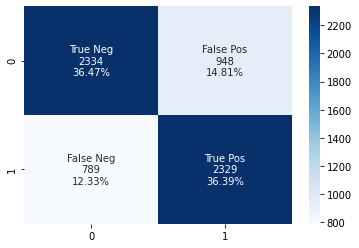

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

cf_matrix = confusion_matrix(targets_test, targets_predicted)
plot_confusion_matrix(cf_matrix)

**Printing Classification Report**

In [61]:
target_names = ['Negative','Positive']
print(classification_report(targets_test, targets_predicted, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      3282
    Positive       0.71      0.75      0.73      3118

    accuracy                           0.73      6400
   macro avg       0.73      0.73      0.73      6400
weighted avg       0.73      0.73      0.73      6400

